# Machine Learning Workflow Lesson

Let’s create a simple multivariate classification logistic regression model using a real dataset. The dataset we will be using are the voting records from the 1984 United States Congress. The goal of the machine learning model will be to determine the political party of a senator based on their voting record.

The data is stored in CSV format and contains no column headers.

The data file can be found at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

First let's load the data and take a look at what we've got here.

In [83]:
import pandas as pd

file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
df = pd.read_csv(file,header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Exercise 1

A first look at the data tells us that we need to properly label the columns.

Here is a code for the column name. 

0. political_party
1. handicapped-infants
2. water-project-cost-sharing
3. adoption-of-the-budget-resolution
4. physician-fee-freeze
5. el-salvador-aid
6. religious-groups-in-schools
7. anti-satellite-test-ban
8. aid-to-nicaraguan-contras
9. mx-missile
10. immigration
11. synfuels-corporation-cutback
12. education-spending
13. superfund-right-to-sue
14. crime
15. duty-free-exports
16. export-administration-act-south-africa

**Rename the columns appropriately.**

In [84]:
# solution
df = df.rename(columns={
    0:'political_party',
    1:'handicapped-infants',
    2:'water-project-cost-sharing',
    3:'adoption-of-the-budget-resolution',
    4:'physician-fee-freeze',
    5:'el-salvador-aid',
    6:'religious-groups-in-schools',
    7:'anti-satellite-test-ban',
    8:'aid-to-nicaraguan-contras',
    9:'mx-missile',
    10:'immigration',
    11:'synfuels-corporation-cutback',
    12:'education-spending',
    13:'superfund-right-to-sue',
    14:'crime',
    15:'duty-free-exports',
    16:'export-administration-act-south-africa'})
# df.head()

# hint
# use df.rename() for this

## Exercise 2

Now the data set has labeled columns! Now we need to discretize the data.

For each bill (column) each senator (row) voited either

* n = Nay (negative)
* y = Yay (affirmative)
* ? = Present (neutral)

Convert all of the _nays_ to **zero**, _yays_ to **one** and _present_ votes to **three**.

We will also need to discretize the target variable which is _political_party_. Change _republican_ to **zero** and _democrat_ to **one**, this sets a binary identifier to the target variable.

**Discretize all of the variables as described above**

In [85]:
# solution
df = df.replace({'n':0, 'y':1, '?':3, 'republican':0, 'democrat':1})
df.head(2)

# hint
# use df.replace() to map a dictionary over the string values in each column

,political_party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,0,1,1,1,0,0,0,1,3,1,1,1,0,1
1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,3


## Exercise 3

Now our data has been conditioned and is ready to be used in a logistic regression model. Now we need to separate the feature columns from the political party column to create an unlabeled set for model development.

**Set a variable _y_ as the target variable & create a _features_ variable with the non-target data columns**


In [86]:
# solution
y = df['political_party']
features = df.drop(columns=['political_party'])

# hint
# The y variable is one column from the data frame, the features variabkle is all remaining columns as a dataframe

## Exercise 4

More often than not, it is required to normalize the distribution and variance of features included in a ML model. This will prevent any one of the features from having a biased effect on the model. 

Scikit-learn offers an easy tool for achieving this: _StandardScaler_. **Use this tool to normalize and transform the data**

In [87]:
# solution
from sklearn.preprocessing import StandardScaler
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

# hint
# from sklearn.preprocessing import StandardScaler
# standard_scaler_fit = StandardScaler().fit('feature variable')
# X = standard_scaler_fit.transform('feature variable')

## Exercise 5

Standard in the machine learning workflow is to split the data set into a training and testing set. The _training_ set will be used to teach the model while the _test_ set will be used to evaluate the performance of the model.

scikit-learn offers another handy tool to achieve this: _train_test_split()_. At this point we have our target variable (_y_) and normalized feature variables (_X_).

**Split _y_ and _X_ variables into 80% training and 20% testing set.**

In [88]:
# soution
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# hint
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split('transformed features', 'target variable', test_size='percentage ratained for testing', random_state=99)

## Exercise 6

Awesome! After the previous conditioning steps are complete we are ready to train our model. We are planning to fit a logitistic regression model to our data which will be able to accurately determine the political party of a senator based on his voting patterns. To do this we will use _LogisticRegression()_ package from scikit-learn.

* **Import LogisticRegression() from sklearn.model_selection**
* **Setup a variable named _clf_no_reg_ as LogisticRegression()**
* **Then fit the model using the training data set**

In [89]:
# solution
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# hint 
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(penalty = 'none') #(Remember to set the penalty parameter to 'none'!)
# clf.fit('training X set', 'training y set')

LogisticRegression()

## Exercise 7

Great! Now we have a model that has been fit to our test data. Next step is to evaluate our model's performance.

Our model now can predict outcomes based on any random input of votes for each included senate bill. scikit-learn offers a _metrics()_ package which will allow us to calculate the f1-score easily. 

* **Predict _y_ variables using our model for both the test and training data sets**
* **Import _f1_score_ from _sklearn.metrics_**
* **Print the scores for each set to evaluate the model accuracy**

In [90]:
# solution
from sklearn.metrics import f1_score
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

# hint
# from sklearn.metrics import f1_score
# y_pred_test = clf.predict('test X set')
# y_pred_train = clf.predict('training X set')
# print('Training Score', f1_score('training y set', y_pred_train))
# print('Testing Score', f1_score('test X set', y_pred_test))

Training Score 0.9523809523809523
Testing Score 0.9203539823008849


## Exercise 8

Wow! Our model works quite well. In practice the first attempt to fit a model will likely produce suboptimal results. For this reason, next steps often involve hyperparameter tuning to improve the model. 

There are many parameters to investigate for tuning purposes. One option is the inverse of the regularization strength which is defined by _LogisticRegression( C = x )_. This value must be a positive _float_ number. 

Here is an array of C-values to try: 
* C_array = [0.0001, 0.001, 0.01, 0.1, 1]

**Iterate through these values, each time fitting a new model, then store the f1-score in an array for both the train and test sets**

In [91]:
# solution
# Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for x in C_array:
    clf = LogisticRegression(C = x )
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))
    

## Exercise 9

Perfect! This practice created an array of model f1-scores which can be used to find the optimal value (aka tuning your model!)

Often times visualizations offer an easier way to digest information. 

**Use matplotlib.pyplot to create a line plot showing the test and training set f1-score collected in the previous step.**

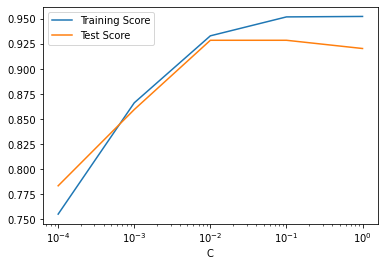

<Figure size 432x288 with 0 Axes>

In [92]:
# solution
plt.plot(C_array,training_array, label = 'Training Score')
plt.plot(C_array,test_array, label = 'Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()
plt.clf()

# hint
# plt.plot(C_array,training_array, label = 'Training Score')
# plt.plot(C_array,test_array, label = 'Test Score')
# plt.xscale('log')
# plt.xlabel('C')
# plt.legend()
# plt.show()
# plt.clf()

## Conclusion

Amazing! from this graph we can see that a C-value of 0.1 is optimum. Now, one parameter of our model has been tuned to offer optimal performance. This step is repeated until acceptable results are found or all options are exhausted.

In this lesson you have performed the basic steps associated with a typical machine learning workflow, Congratulations!